In [103]:
import pymorphy2
import re
morph = pymorphy2.MorphAnalyzer()

with open('esse.txt',  encoding='utf-8') as f:
    ls = [
        [morph.parse(word)[0].normal_form for word in re.findall(r'\w+', line)]
        for line in f
    ]

print(ls)

[['сартр', 'мы', 'знать', 'как', 'гениальный', 'писатель', 'лауреат', 'нобелевский', 'премия', 'по', 'литература', 'философ', 'он', 'считать', 'что', 'человек', 'не', 'безвольный', 'игрушка', 'а', 'свободный', 'личность', 'сознательно', 'проектировать', 'свой', 'жизнь', 'и', 'несущий', 'ответственность', 'за', 'свой', 'поступок', 'важный', 'задача', 'он', 'считать', 'поиск', 'смысл', 'существование', 'человек', 'в', 'мир'], ['философ', 'утверждать', 'что', 'смысл', 'возникать', 'при', 'вхождение', 'человек', 'в', 'конкретный', 'ситуация', 'за', 'предел', 'конкретный', 'ситуация', 'для', 'человек', 'вообще', 'нет', 'никакой', 'смысл', 'как', 'нет', 'и', 'абсолют', 'атеистический', 'экзистенциализм', 'представитель', 'который', 'являться', 'я', 'говорить', 'сартр', 'учить', 'что', 'если', 'даже', 'бог', 'нет', 'то', 'есть', 'по', 'крайний', 'мера', 'один', 'бытие', 'который', 'существование', 'предшествовать', 'сущность', 'и', 'это', 'бытие', 'являться', 'человек'], ['согласно', 'сартр',

In [107]:
text = "".join(map(str,ls))
print(text)

['сартр', 'мы', 'знать', 'как', 'гениальный', 'писатель', 'лауреат', 'нобелевский', 'премия', 'по', 'литература', 'философ', 'он', 'считать', 'что', 'человек', 'не', 'безвольный', 'игрушка', 'а', 'свободный', 'личность', 'сознательно', 'проектировать', 'свой', 'жизнь', 'и', 'несущий', 'ответственность', 'за', 'свой', 'поступок', 'важный', 'задача', 'он', 'считать', 'поиск', 'смысл', 'существование', 'человек', 'в', 'мир']['философ', 'утверждать', 'что', 'смысл', 'возникать', 'при', 'вхождение', 'человек', 'в', 'конкретный', 'ситуация', 'за', 'предел', 'конкретный', 'ситуация', 'для', 'человек', 'вообще', 'нет', 'никакой', 'смысл', 'как', 'нет', 'и', 'абсолют', 'атеистический', 'экзистенциализм', 'представитель', 'который', 'являться', 'я', 'говорить', 'сартр', 'учить', 'что', 'если', 'даже', 'бог', 'нет', 'то', 'есть', 'по', 'крайний', 'мера', 'один', 'бытие', 'который', 'существование', 'предшествовать', 'сущность', 'и', 'это', 'бытие', 'являться', 'человек']['согласно', 'сартр', 'сущ

In [108]:
len(text)

11970

In [109]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [110]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [111]:
text = "".join([ch for ch in text if ch not in spec_chars])

In [112]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [113]:
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [114]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vladislav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
len(text_tokens)

1220

In [116]:
text_tokens[:10]

['сартр',
 'мы',
 'знать',
 'как',
 'гениальный',
 'писатель',
 'лауреат',
 'нобелевский',
 'премия',
 'по']

In [121]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words('russian')
text_sw = [word for word in text_tokens if not word in russian_stopwords]

In [122]:
import nltk
text = nltk.Text(text_sw)

In [123]:
print(type(text))

<class 'nltk.text.Text'>


In [124]:
text[:10]

['сартр',
 'знать',
 'гениальный',
 'писатель',
 'лауреат',
 'нобелевский',
 'премия',
 'литература',
 'философ',
 'считать']

In [125]:
from nltk.probability import FreqDist
fdist = FreqDist(text)

In [126]:
fdist.most_common(5)

[('человек', 37), ('который', 21), ('сартр', 20), ('жизнь', 18), ('мочь', 18)]

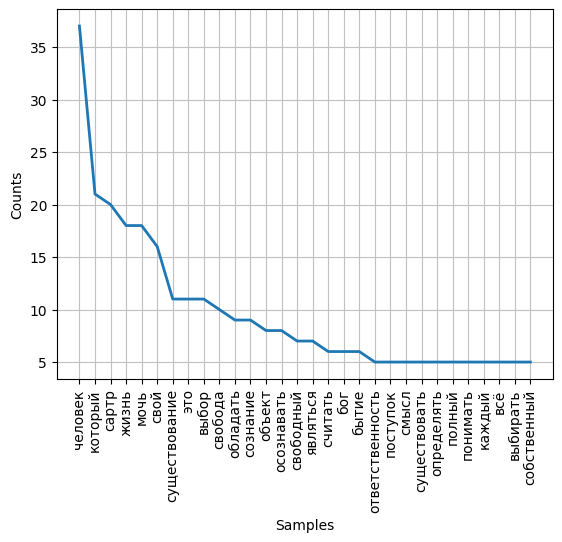

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [127]:
fdist.plot(30,cumulative=False)

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
text_raw = " ".join(text)

In [130]:
wordcloud = WordCloud().generate(text_raw)

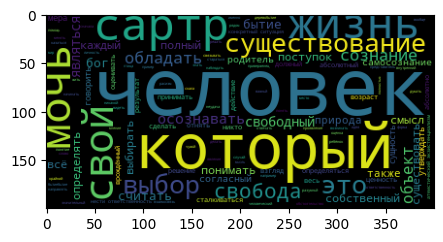

In [131]:
plt.figure(figsize=(5,5))
plt.imshow(wordcloud)